In [12]:
from tabpfn import TabPFNRegressor
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os
import time
from sklearn.model_selection import KFold
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# import pandas as pd
# import os
# from sklearn.model_selection import KFold

# features = ['pcr_adm_final', 'sat_fio2', 'creatinina_adm_final', 'fc_adm_final', 'plaquetas_adm_final']


# def process_mcar_features(features, mcar_dir, original_filepath, output_dir_kfold, n_splits=10, random_state=78):

#     df_original = pd.read_parquet(original_filepath)

#     for feature in features:
#         print(f"\nProcessando feature: {feature}")

#         mcar_path = os.path.join(mcar_dir, f"{feature}_mcar_50.parquet")
#         df_mcar = pd.read_parquet(mcar_path)

#         idx_missing = df_mcar[df_mcar[feature].isna()].index

#         df_nans = df_mcar.loc[idx_missing]
#         df_controle = df_original.loc[idx_missing]

#         feature_dir = os.path.join(output_dir_kfold, feature)
#         os.makedirs(feature_dir, exist_ok=True)

#         df_nans.to_parquet(os.path.join(feature_dir, 'df_nans.parquet'), index=True)
#         df_controle.to_parquet(os.path.join(feature_dir, 'df_controle.parquet'), index=True)

#         print(f"df_nans: {df_nans.shape}, NaNs: {df_nans[feature].isna().sum()}")
#         print(f"df_controle: {df_controle.shape}, NaNs: {df_controle[feature].isna().sum()}")


#         kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
#         for i, (train_idx, test_idx) in enumerate(kf.split(df_nans)):
#             df_train = df_controle.iloc[train_idx]
#             df_test = df_nans.iloc[test_idx]

#             df_train.to_parquet(os.path.join(feature_dir, f'fold{i}_train.parquet'), index=True)
#             df_test.to_parquet(os.path.join(feature_dir, f'fold{i}_test.parquet'), index=True)

#             print(f"Fold {i} salvo para {feature}: treino({len(df_train)}), teste({len(df_test)})")



# mcar_dir = '/home/izadoraganem/Imputation/Revista médica/MCAR50'
# original_filepath = '/home/izadoraganem/Imputation/Revista médica/Data/Base_onda_Onda 1_desfecho_obito_variaveis_all.parquet'
# output_dir_kfold = '/home/izadoraganem/Imputation/Revista médica/KFOLD'

# process_mcar_features(features, mcar_dir, original_filepath, output_dir_kfold)



Processando feature: pcr_adm_final
df_nans: (2648, 62), NaNs: 2648
df_controle: (2648, 62), NaNs: 0
Fold 0 salvo para pcr_adm_final: treino(2383), teste(265)
Fold 1 salvo para pcr_adm_final: treino(2383), teste(265)
Fold 2 salvo para pcr_adm_final: treino(2383), teste(265)
Fold 3 salvo para pcr_adm_final: treino(2383), teste(265)
Fold 4 salvo para pcr_adm_final: treino(2383), teste(265)
Fold 5 salvo para pcr_adm_final: treino(2383), teste(265)
Fold 6 salvo para pcr_adm_final: treino(2383), teste(265)
Fold 7 salvo para pcr_adm_final: treino(2383), teste(265)
Fold 8 salvo para pcr_adm_final: treino(2384), teste(264)
Fold 9 salvo para pcr_adm_final: treino(2384), teste(264)

Processando feature: sat_fio2
df_nans: (3030, 62), NaNs: 3030
df_controle: (3030, 62), NaNs: 0
Fold 0 salvo para sat_fio2: treino(2727), teste(303)
Fold 1 salvo para sat_fio2: treino(2727), teste(303)
Fold 2 salvo para sat_fio2: treino(2727), teste(303)
Fold 3 salvo para sat_fio2: treino(2727), teste(303)
Fold 4 salv

In [15]:
# top10 = ['sat_fio2', "vm_adm_final", "po2_fio2_adm_final", "fr_adm_final", "obito", "Hospital_GDP", "plaquetas_adm_final", "fc_adm_final", "bicarbonato_adm_final", "ph_adm_final", "pcr_adm_final"]

def missforest(df_train, df_test, feature):
    imputer = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=7), 
                               max_iter=20, random_state=7)
    imputer.fit(df_train)
    df_imputed = df_test.copy()
    df_imputed[:] = imputer.transform(df_test)
    return pd.DataFrame(df_imputed, columns=df_test.columns, index=df_test.index)

def MICE(df_train, df_test, feature):
    imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=20, random_state=7)
    imputer.fit(df_train)
    df_imputed = df_test.copy()
    df_imputed = imputer.transform(df_test)
    return pd.DataFrame(df_imputed, columns=df_test.columns, index=df_test.index)

def KNN(df_train, df_test, feature):
    imputer = KNNImputer(n_neighbors=10)
    imputer.fit(df_train)
    df_imputed = df_test.copy()
    df_imputed = imputer.transform(df_test)
    return pd.DataFrame(df_imputed, columns=df_test.columns, index=df_test.index)

# def KNN_otimizado(df_train, df_test, feature):
#     imputer = KNNImputer(n_neighbors=3)
#     imputer.fit(df_train[top10])
#     df_imputed = df_test.copy()
#     df_imputed = imputer.transform(df_test[top10])
#     return pd.DataFrame(df_imputed, columns=df_test[top10].columns, index=df_test.index)


def Mean(df_train, df_test, feature):
    df_imputed = df_test.copy()
    mean = df_train[feature].mean()
    # print(f"Mean for {feature}: {mean}")
    df_imputed[feature] = df_test[feature].fillna(mean)
    return pd.DataFrame(df_imputed, columns=df_test.columns, index=df_test.index)


def tabpfn_imputer(df_train, df_test, feature):
    df_imputed = df_test.copy()
    X_train_1 = df_train.drop(columns=[feature])
    y_train = df_train[feature]
    # regressor com cuda - roda em GPU
    reg = TabPFNRegressor(device="cuda")
    reg.fit(X_train_1.values, y_train.values)
    preds = reg.predict(df_test.drop(columns=[feature]).values)
    df_imputed[feature] = preds
    return pd.DataFrame(df_imputed, columns=df_test.columns, index=df_test.index)

In [ ]:
features = ['pcr_adm_final', 'sat_fio2', 'creatinina_adm_final', 'fc_adm_final', 'plaquetas_adm_final']

def calculate_errors(df_true, df_imputed, column):
    df_subset = df_true.loc[df_imputed.index, :]
    mae = mean_absolute_error(df_subset[column], df_imputed[column])
    mse = mean_squared_error(df_subset[column], df_imputed[column])
    return mae, mse

for feature in features:

    # if (feature == 'creatinina_adm_final'):
    #     top10 = ['creatinina_adm_final', "vm_adm_final", "po2_fio2_adm_final", "fr_adm_final", "obito", "Hospital_GDP", "plaquetas_adm_final", "fc_adm_final", "bicarbonato_adm_final", "ph_adm_final", "pcr_adm_final"]
    # else:
    #     top10 = ['sat_fio2', "vm_adm_final", "po2_fio2_adm_final", "fr_adm_final", "obito", "Hospital_GDP", "plaquetas_adm_final", "fc_adm_final", "bicarbonato_adm_final", "ph_adm_final", "pcr_adm_final"]


    dir = f"/home/izadoraganem/Imputation/Revista médica/sem_erro/{feature}"

    imputadores = {'média': Mean,'knn': KNN,'mice': MICE, 'tabpfn': tabpfn_imputer, 'missforest': missforest}
    metricas = []

    df_controle = pd.read_parquet(f"{dir}/df_controle.parquet")
    # print(df_controle.shape, df_controle[feature].isna().sum())

    for i in range(10): 
        
        X_train = pd.read_parquet(f"{dir}/fold{i}_train.parquet")
        X_test  = pd.read_parquet(f"{dir}/fold{i}_test.parquet")


        for nome, func in imputadores.items():
            # print(func, nome)
            start_time = time.time()
            # print(X_train.shape, X_test.shape)
            # print(X_train[feature].isna().sum(), X_test[feature].isna().sum())
            df_imputed = func(X_train.copy(), X_test.copy(), feature)
            tempo = time.time() - start_time

            output_path = f"RESULTS/{feature}/{nome}"
            # cria pastas (exist_ok=True evita erro se já existir)
            os.makedirs(output_path, exist_ok=True)
            # salva o arquivo parquet
            df_imputed.to_parquet(f"{output_path}/df_imputed_fold_{i}.parquet", index=True)


           ç

            mae, mse = calculate_errors(df_controle, df_imputed, feature)

            # print(f"Fold {i}, Método: {nome}, MAE: {mae:.4f}, MSE: {mse:.4f}, Tempo: {tempo:.2f} segundos")

            metricas.append({
                'fold': i,
                'metodo': nome,
                'mae': mae,
                'mse': mse,
                'tempo_segundos': tempo
            })

    df_metricas = pd.DataFrame(metricas)
    df_metricas.to_csv(f'/home/izadoraganem/Imputation/Revista médica/METRICAS/{feature}metricas_imputacao2.csv', index=False)
    print(df_metricas.groupby('metodo').mean())


/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home

            fold        mae          mse  tempo_segundos
metodo                                                  
knn          4.5  66.016123  6896.441287        0.080920
mice         4.5  58.375532  6305.480762        2.195769
missforest   4.5  58.721099  6223.472746       69.519324
média        4.5  64.350213  7108.680918        0.000507
tabpfn       4.5  50.963537  5028.681302        1.126046


/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home

            fold        mae           mse  tempo_segundos
metodo                                                   
knn          4.5  86.539202  19529.651892        0.074453
mice         4.5  64.843071  14951.004175        2.346194
missforest   4.5  51.098800  11178.079882       78.056889
média        4.5  95.290915  19064.328042        0.000464
tabpfn       4.5  41.335154   9097.366997        1.286043


/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home

            fold       mae       mse  tempo_segundos
metodo                                              
knn          4.5  0.717767  1.862329        0.068651
mice         4.5  0.410267  0.769174        2.447378
missforest   4.5  0.398852  0.915934       75.307210
média        4.5  0.623403  1.737141        0.000455
tabpfn       4.5  0.320153  0.597390        1.188036


/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home

            fold        mae          mse  tempo_segundos
metodo                                                  
knn          4.5  13.713644   312.401009        0.089684
mice         4.5  13.370373  3372.024409        3.171216
missforest   4.5  12.676143   262.981708       78.930478
média        4.5  13.049485   278.334335        0.000438
tabpfn       4.5  11.844691   233.518249        1.264049


/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/izadoraganem/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home

            fold           mae           mse  tempo_segundos
metodo                                                      
knn          4.5  63606.526489  7.483011e+09        0.077100
mice         4.5  70946.136504  2.159427e+11        1.307509
missforest   4.5  62089.640026  7.159054e+09       76.811245
média        4.5  66250.403532  7.908080e+09        0.000522
tabpfn       4.5  55758.611066  5.887709e+09        1.273212


### Lógica de Quadrantes

In [ ]:
features = ['pcr_adm_final', 'sat_fio2', 'creatinina_adm_final', 'fc_adm_final', 'plaquetas_adm_final']

imputadores = {'tabpfn': tabpfn_imputer, 'média': Mean, 'knn': KNN, 'mice': MICE, 'missforest': missforest}

results_features = {}

for feature in features:
    print(f"Processando feature: {feature}")
    
    dfs = {nome: [] for nome in imputadores.keys()}
    
    for i in range(10):
        for nome, func in imputadores.items():

            fold = pd.read_parquet(f'/home/izadoraganem/Imputation/Revista médica/RESULTS/{feature}/{nome}/df_imputed_fold_{i}.parquet')
            dfs[nome].append(fold[[feature]])
    
    for nome in dfs.keys():
        dfs[nome] = pd.concat(dfs[nome], axis=0)
    
    results_final = pd.concat(dfs, axis=1)
    results_final.columns = results_final.columns.droplevel(1) 
    results_features[feature] = results_final



Processando feature: pcr_adm_final
Processando feature: sat_fio2
Processando feature: creatinina_adm_final
Processando feature: fc_adm_final
Processando feature: plaquetas_adm_final


In [20]:
for feature in features:
    print(results_features[feature])

           tabpfn      média      knn        mice  missforest
index                                                        
13     192.558121  97.352668  131.244  171.369570     101.278
55      88.330872  97.352668  115.610   68.278737      91.645
57      92.447433  97.352668   80.152   88.405488      80.260
102     55.941078  97.352668   74.635   66.982407      60.460
137     61.944054  97.352668   80.979   99.806995      76.610
...           ...        ...      ...         ...         ...
7600   116.685623  97.588064  139.612  114.743328      92.040
7617   177.698456  97.588064  128.472  149.816620     159.330
7620   171.394150  97.588064  124.192  218.616188     149.818
7657    15.289466  97.588064   77.989  101.784874     146.818
7684   111.121628  97.588064  129.400  155.001826     176.963

[2648 rows x 5 columns]
           tabpfn       média         knn        mice  missforest
index                                                            
10     370.304382  370.271570  393.21

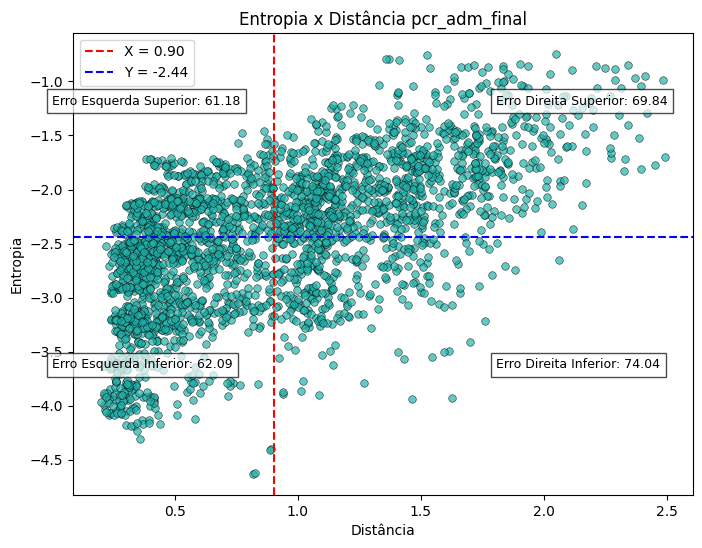

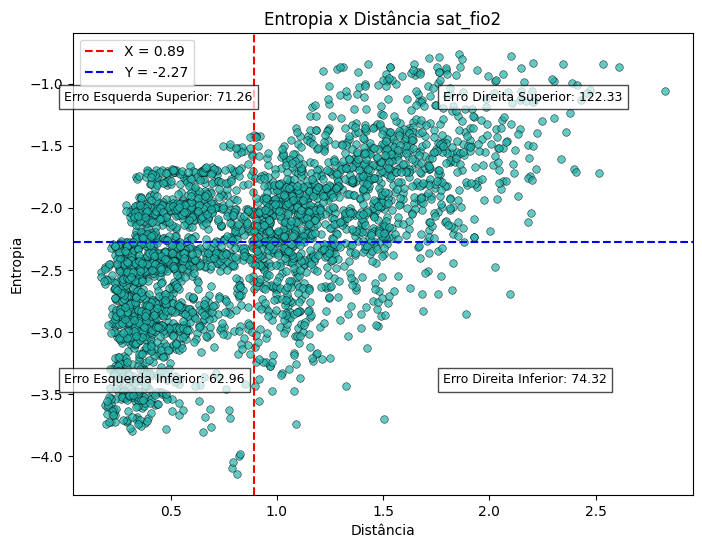

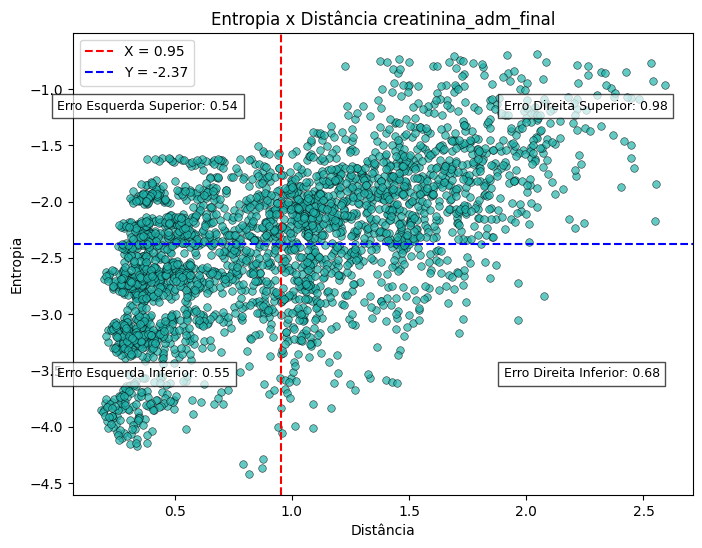

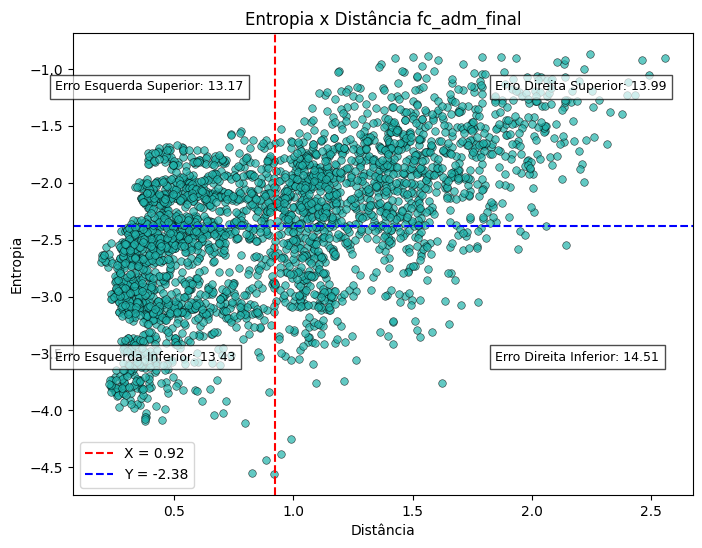

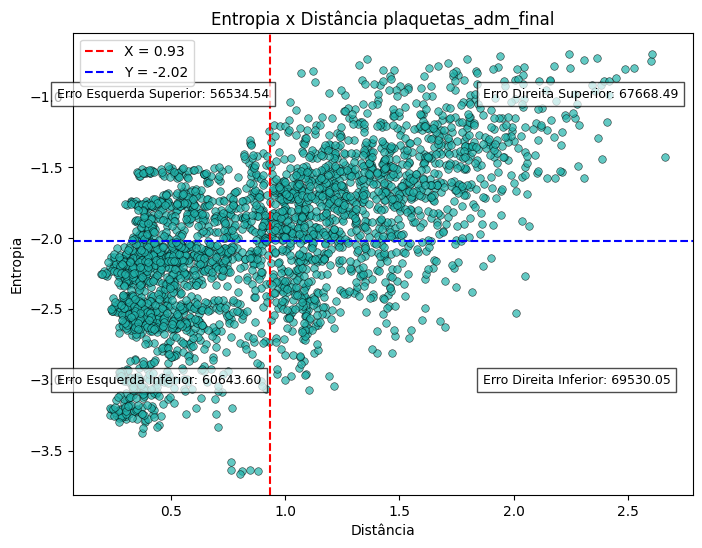

In [42]:

for feature in features:
    dir = f"/home/izadoraganem/Imputation/Revista médica/sem_erro/{feature}"
    df_controle = pd.read_parquet(f"{dir}/df_controle.parquet")
    df = df_controle.copy()

    results_final = results_features[feature]

    # imputação inicial
    imputer = KNNImputer(n_neighbors=10)
    df_notNan = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)

    # normalização mantendo DataFrame
    scaler = MinMaxScaler()
    df_select = pd.DataFrame(
        scaler.fit_transform(df_notNan),
        columns=df.columns,
        index=df.index
    )

    
    nbrs = NearestNeighbors(n_neighbors=11, metric="euclidean") 
    nbrs.fit(df_select)  

    distances, indices = nbrs.kneighbors(df_select)  

    distancia_media_dict = {
        index: distances[i, 1:].mean()
        for i, index in enumerate(df_select.index)
        if index in results_final.index
    }
    results_final["Distancia Media"] = results_final.index.map(distancia_media_dict)

    entropia_media_dict = {}

    for i, index in enumerate(df_select.index):
        if index in results_final.index:
            vizinhos_indices = indices[i, 1:] 

            vizinhos_valores = df_select.iloc[vizinhos_indices].values.flatten()

            kde = gaussian_kde(vizinhos_valores)
            pdf_values = kde(vizinhos_valores)

            entropy = -np.sum(pdf_values * np.log(pdf_values + 1e-10)) / len(vizinhos_valores)


            entropia_media_dict[index] = entropy

    results_final["Entropia"] = results_final.index.map(entropia_media_dict)

    results_final["Erro Absoluto knn++"] = abs(results_final['knn'] - df_controle[feature])

    media_x = results_final["Distancia Media"].mean()
    media_y = results_final["Entropia"].mean()

    results_final["quadrante"] = np.where(results_final["Distancia Media"] >= media_x, "Direita", "Esquerda")
    results_final["quadrante"] += np.where(results_final["Entropia"] >= media_y, " Superior", " Inferior")

    erro_medio = results_final.groupby("quadrante")["Erro Absoluto knn++"].mean()

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=results_final, x="Distancia Media", y="Entropia", alpha=0.7, color="lightseagreen", edgecolor = "black", s=30)

    plt.axvline(media_x, color="red", linestyle="--", linewidth=1.5, label=f"X = {media_x:.2f}")
    plt.axhline(media_y, color="blue", linestyle="--", linewidth=1.5, label=f"Y = {media_y:.2f}")

    quadrantes_posicoes = {
        "Esquerda Inferior": (media_x * -0.0, media_y * 1.5),
        "Esquerda Superior": (media_x * -0.0, media_y * 0.5),
        "Direita Inferior": (media_x * 2, media_y * 1.5),
        "Direita Superior": (media_x * 2, media_y * 0.5)
    }

    for quad, pos in quadrantes_posicoes.items():
        plt.text(pos[0], pos[1], f"Erro {quad}: {erro_medio.get(quad, 0):.2f}", 
                fontsize=9, bbox=dict(facecolor='white', alpha=0.7))

    plt.xlabel("Distância")
    plt.ylabel("Entropia")
    plt.title(f"Entropia x Distância {feature}")
    plt.legend()

    plt.show()

    # mae_quadrantes = pd.DataFrame({
    #     "tabpfn": abs(results_final["tabpfn"] - df_controle[feature]),
    #     "média": abs(results_final["média"] - df_controle[feature]),
    #     "knn": abs(results_final["knn"] - df_controle[feature]),
    #     "mice": abs(results_final["mice"] - df_controle[feature]),
    #     "missforest": abs(results_final["missforest"] - df_controle[feature]),
    #     "quadrante": results_final["quadrante"]
    # })

    # mae_quadrantes = mae_quadrantes.groupby("quadrante").mean().round(3)

    # print(f"\n===== {feature} =====")
    # print(mae_quadrantes)


